# Solution Approach
Problem Statement - To predict if an existing customer of a car insurance company will raise a claim in the upcoming 6 months or not.

Below are the steps taken to find an optimized model for the given classification problem:

After loading the dataset and doing basic exploration, it is noticed that the event(claim raised by a customer) count is around 6%. Further, there are no missing values in the dataset.

From basic EDA, it is found out that there are more categorical and binary features in the dataset compared to the numerical feature. Further, there is no significant linear relationship between any feature and target variable.

The dataset is split into train and validation sets(70:30). The categorical variables are encoded using the label encoder.

Tree-based models generally works well for this type of class imbalance problem. So, the Decision tree is used.

F1 score has been chosen as the evaluation metric as per the contest requirement. But, depending on the business setup, we can either use recall/precision as the evaluation metric. A detailed cost-benefit analysis of acquiring a customer vs claim payment needs to be done to solve the problem.

After getting the optimal hypermeters the model is fitted with the entire training dataset.

F1 score on the validation set is 0.15374.

## Load the dataset and do basic checks

In [1]:
import pandas as pd
x = pd.read_csv('train_qWM28Yl.csv')
x.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [2]:
policy_id = x['policy_id']
policy_id.head(2)

0    ID00001
1    ID00002
Name: policy_id, dtype: object

In [3]:
x.describe

<bound method NDFrame.describe of       policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0       ID00001       0.515874        0.05             0.644231           C1   
1       ID00002       0.672619        0.02             0.375000           C2   
2       ID00003       0.841110        0.02             0.384615           C3   
3       ID00004       0.900277        0.11             0.432692           C4   
4       ID00005       0.596403        0.11             0.634615           C5   
...         ...            ...         ...                  ...          ...   
58587   ID58588       0.355089        0.13             0.644231           C8   
58588   ID58589       1.199642        0.02             0.519231          C14   
58589   ID58590       1.162273        0.05             0.451923           C5   
58590   ID58591       1.236307        0.14             0.557692           C8   
58591   ID58592       0.124429        0.02             0.442308           C8   

     

In [4]:
x.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [5]:
x.dtypes

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type               

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [7]:
x['is_claim'].value_counts(normalize = True)

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

## EDA

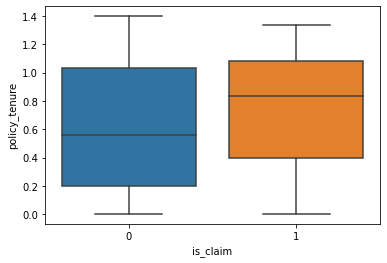

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x = 'is_claim', y = 'policy_tenure', data = x)
plt.show()

<AxesSubplot:xlabel='is_claim', ylabel='age_of_car'>

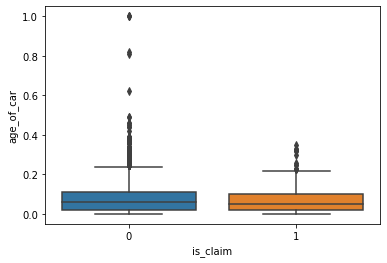

In [9]:
sns.boxplot(x = 'is_claim', y = 'age_of_car', data = x)

<AxesSubplot:xlabel='is_claim', ylabel='age_of_policyholder'>

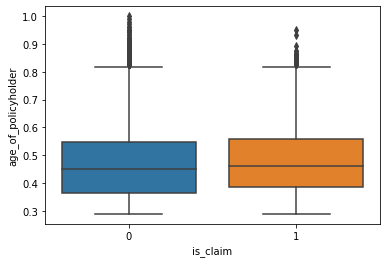

In [10]:
sns.boxplot(x = 'is_claim', y = 'age_of_policyholder', data = x)

<AxesSubplot:xlabel='area_cluster', ylabel='Density'>

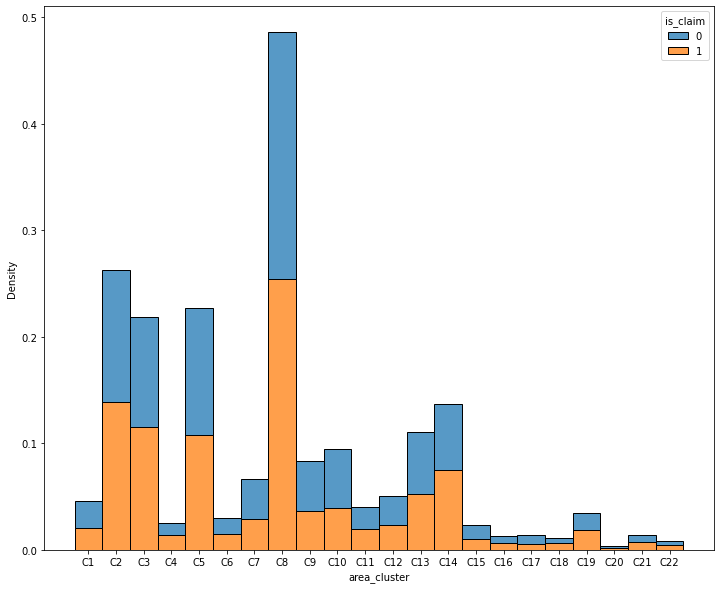

In [11]:
plt.figure(figsize = (12,10))
sns.histplot(x = 'area_cluster', hue = 'is_claim', data = x, multiple = 'stack', stat = 'density', common_norm=False)

<AxesSubplot:xlabel='is_claim', ylabel='population_density'>

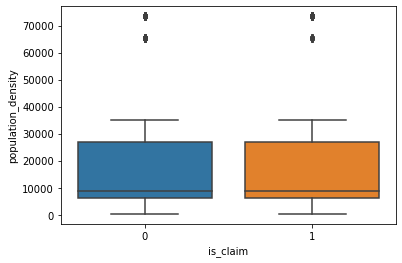

In [12]:
sns.boxplot(x = 'is_claim', y = 'population_density', data = x)

<AxesSubplot:xlabel='make', ylabel='Density'>

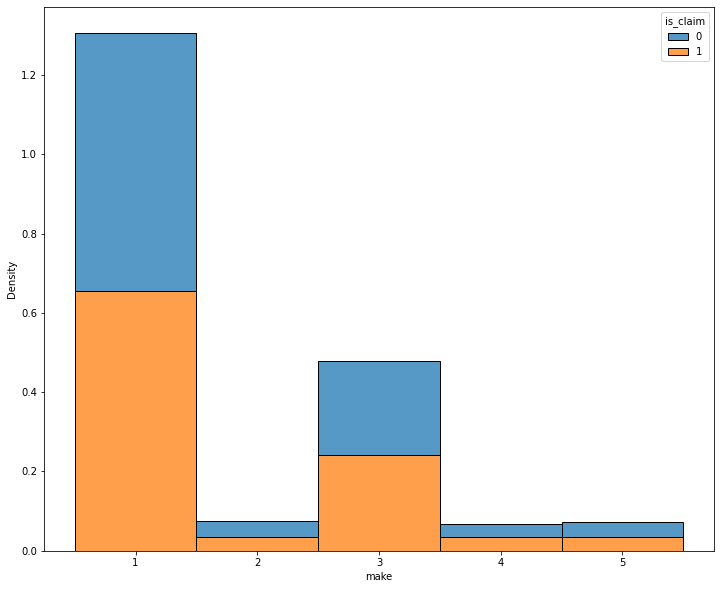

In [13]:
x['make'] = x['make'].astype('category')
plt.figure(figsize = (12,10))
sns.histplot(x = 'make', hue = 'is_claim', data = x, multiple = 'stack', stat = 'density', common_norm=False)

## Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le_claim = LabelEncoder()

In [16]:

x['area_cluster'] = le_claim.fit_transform(x['area_cluster'])
x['segment'] = le_claim.fit_transform(x['segment'])
x['model'] = le_claim.fit_transform(x['model'])
x['fuel_type'] = le_claim.fit_transform(x['fuel_type'])

x['steering_type'] = le_claim.fit_transform(x['steering_type'])
x['transmission_type'] = le_claim.fit_transform(x['transmission_type'])
x['steering_type'] = le_claim.fit_transform(x['steering_type'])
x['rear_brakes_type'] = le_claim.fit_transform(x['rear_brakes_type'])
x['is_parking_camera'] = le_claim.fit_transform(x['is_parking_camera'])
x['is_parking_sensors'] = le_claim.fit_transform(x['is_parking_sensors'])
x['is_tpms'] = le_claim.fit_transform(x['is_tpms'])
x['is_adjustable_steering'] = le_claim.fit_transform(x['is_adjustable_steering'])
x['is_esc'] = le_claim.fit_transform(x['is_esc'])
x['engine_type'] = le_claim.fit_transform(x['engine_type'])
x['max_power'] = le_claim.fit_transform(x['max_power'])
x['max_torque'] = le_claim.fit_transform(x['max_torque'])
x['fuel_type'] = le_claim.fit_transform(x['fuel_type'])

                                              
x['is_front_fog_lights'] = le_claim.fit_transform(x['is_front_fog_lights'])
x['is_rear_window_wiper'] = le_claim.fit_transform(x['is_rear_window_wiper'])
x['is_rear_window_washer'] = le_claim.fit_transform(x['is_rear_window_washer'])
x['is_rear_window_defogger'] = le_claim.fit_transform(x['is_rear_window_defogger'])
x['is_brake_assist'] = le_claim.fit_transform(x['is_brake_assist'])
x['is_power_door_locks'] = le_claim.fit_transform(x['is_power_door_locks'])
x['is_power_steering'] = le_claim.fit_transform(x['is_power_steering'])
x['is_central_locking'] = le_claim.fit_transform(x['is_central_locking'])
x['is_driver_seat_height_adjustable'] = le_claim.fit_transform(x['is_driver_seat_height_adjustable'])
x['is_day_night_rear_view_mirror'] = le_claim.fit_transform(x['is_day_night_rear_view_mirror'])
x['is_ecw'] = le_claim.fit_transform(x['is_ecw'])
x['is_speed_alert'] = le_claim.fit_transform(x['is_speed_alert'])



x.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,0,4990,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,ID00002,0.672619,0.02,0.375000,11,27003,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,ID00003,0.841110,0.02,0.384615,15,4076,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,ID00004,0.900277,0.11,0.432692,16,21622,1,3,3,2,...,1,1,1,1,1,1,1,1,2,0
4,ID00005,0.596403,0.11,0.634615,17,34738,2,0,4,2,...,0,1,1,1,0,1,1,1,2,0


In [17]:
x1 = x.drop(['is_claim','policy_id'],axis=1)
y = x['is_claim']

In [18]:
test = pd.read_csv('test_zo1G9sv.csv')
test.head()


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0


In [19]:

test['area_cluster'] = le_claim.fit_transform(test['area_cluster'])
test['segment'] = le_claim.fit_transform(test['segment'])
test['model'] = le_claim.fit_transform(test['model'])
test['fuel_type'] = le_claim.fit_transform(test['fuel_type'])

test['steering_type'] = le_claim.fit_transform(test['steering_type'])
test['transmission_type'] = le_claim.fit_transform(test['transmission_type'])
test['steering_type'] = le_claim.fit_transform(test['steering_type'])
test['rear_brakes_type'] = le_claim.fit_transform(test['rear_brakes_type'])
test['is_parking_camera'] = le_claim.fit_transform(test['is_parking_camera'])
test['is_parking_sensors'] = le_claim.fit_transform(test['is_parking_sensors'])
test['is_tpms'] = le_claim.fit_transform(test['is_tpms'])
test['is_adjustable_steering'] = le_claim.fit_transform(test['is_adjustable_steering'])
test['is_esc'] = le_claim.fit_transform(test['is_esc'])
test['engine_type'] = le_claim.fit_transform(test['engine_type'])
test['max_power'] = le_claim.fit_transform(test['max_power'])
test['max_torque'] = le_claim.fit_transform(test['max_torque'])
test['fuel_type'] = le_claim.fit_transform(test['fuel_type'])

                                              
test['is_front_fog_lights'] = le_claim.fit_transform(test['is_front_fog_lights'])
test['is_rear_window_wiper'] = le_claim.fit_transform(test['is_rear_window_wiper'])
test['is_rear_window_washer'] = le_claim.fit_transform(test['is_rear_window_washer'])
test['is_rear_window_defogger'] = le_claim.fit_transform(test['is_rear_window_defogger'])
test['is_brake_assist'] = le_claim.fit_transform(test['is_brake_assist'])
test['is_power_door_locks'] = le_claim.fit_transform(test['is_power_door_locks'])
test['is_power_steering'] = le_claim.fit_transform(test['is_power_steering'])
test['is_central_locking'] = le_claim.fit_transform(test['is_central_locking'])
test['is_driver_seat_height_adjustable'] = le_claim.fit_transform(test['is_driver_seat_height_adjustable'])
test['is_day_night_rear_view_mirror'] = le_claim.fit_transform(test['is_day_night_rear_view_mirror'])
test['is_ecw'] = le_claim.fit_transform(test['is_ecw'])
test['is_speed_alert'] = le_claim.fit_transform(test['is_speed_alert'])

test.head()


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,15,4076,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,ID58594,0.307241,0.13,0.442308,20,8794,1,2,7,2,...,0,1,1,1,1,1,1,1,1,2
2,ID58595,0.327924,0.12,0.451923,20,8794,2,0,4,2,...,0,0,1,1,1,0,1,1,1,2
3,ID58596,0.782654,0.01,0.461538,17,34738,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,ID58597,1.233404,0.02,0.634615,17,34738,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [20]:
test = test.drop(['policy_id'],axis=1)

## Model Building

In [21]:
# Decision tree

from sklearn import tree
from sklearn.model_selection import train_test_split
model=tree.DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=149,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    random_state=42,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight='balanced',
    ccp_alpha=0.0,)

x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3,random_state=42)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.5972806917738082

In [22]:
y_pred=model.predict(test)
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [23]:
y_pred1 = model.predict(x_test)

In [24]:
from sklearn.metrics import classification_report
random_clf_report = classification_report(y_test,y_pred1)
print(random_clf_report)

              precision    recall  f1-score   support

           0       0.95      0.60      0.74     16417
           1       0.09      0.56      0.15      1161

    accuracy                           0.60     17578
   macro avg       0.52      0.58      0.45     17578
weighted avg       0.89      0.60      0.70     17578



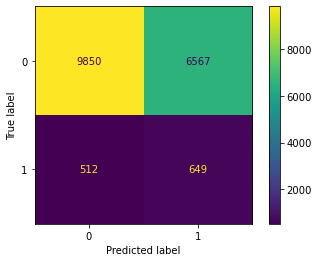

In [25]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)

## Submission file

In [26]:
submission_df = pd.read_csv('sample_submission_KvRh9Sx.csv')
submission_df.head(2)

,policy_id,is_claim
0,ID58593,1
1,ID58594,1


In [27]:
submission_df['policy_id'] = policy_id
submission_df.head(2)

,policy_id,is_claim
0,ID00001,1
1,ID00002,1


In [28]:
submission_df['is_claim'] = y_pred

In [31]:
submission_df['is_claim'].value_counts(normalize = True)

0    0.587871
1    0.412129
Name: is_claim, dtype: float64

In [30]:
#submission_df.to_csv('submission.csv', index=False)